In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [0]:
x = np.arange(0.0,5.0,0.1)
a,b = 1,0
y = a*x+b

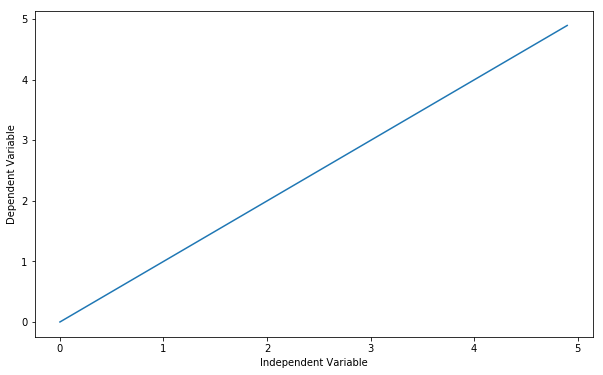

In [0]:
plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [0]:
x_data = np.random.rand(100).astype(np.float32)
y_data = 3*x_data+2
y_data = np.vectorize(lambda y:y+np.random.normal(loc=0.0,scale=0.1))(y_data)

In [0]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a*x_data+b

In [0]:
loss = tf.reduce_mean(tf.square(y-y_data))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
train_data = []
for step in range(100):
  evals = sess.run([train,a,b])[1:]
  if step%5 == 0:
    print(step," ",evals)
    train_data.append(evals)

cr,cg,cb = (1.0,1.0,1.0)

0   [3.0245457, 1.9956994]
5   [3.0245457, 1.9956994]
10   [3.0245457, 1.9956994]
15   [3.0245457, 1.9956994]
20   [3.0245457, 1.9956994]
25   [3.0245457, 1.9956994]
30   [3.0245457, 1.9956994]
35   [3.0245457, 1.9956994]
40   [3.0245457, 1.9956994]
45   [3.0245457, 1.9956994]
50   [3.0245457, 1.9956994]
55   [3.0245457, 1.9956994]
60   [3.0245457, 1.9956994]
65   [3.0245457, 1.9956994]
70   [3.0245457, 1.9956994]
75   [3.0245457, 1.9956994]
80   [3.0245457, 1.9956994]
85   [3.0245457, 1.9956994]
90   [3.0245457, 1.9956994]
95   [3.0245457, 1.9956994]


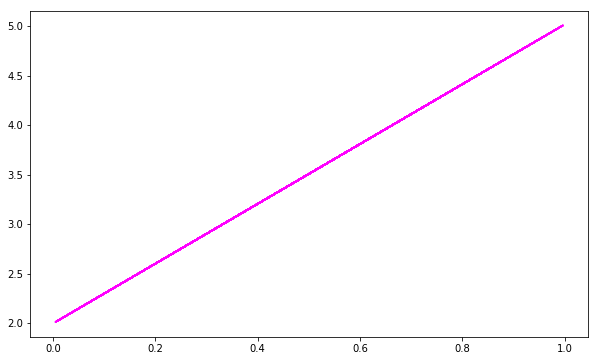

In [0]:
for f in train_data:
  cb += 1.0/len(train_data)
  cg -= 1.0/len(train_data)
  if cb > 1.0:
    cb = 1.0
  if cg < 0.0:
    cg = 0.0
  [a,b] = f
  f_y = np.vectorize(lambda x:a*x+b)(x_data)
  line = plt.plot(x_data,f_y)
  plt.setp(line,color=(cr,cg,cb))

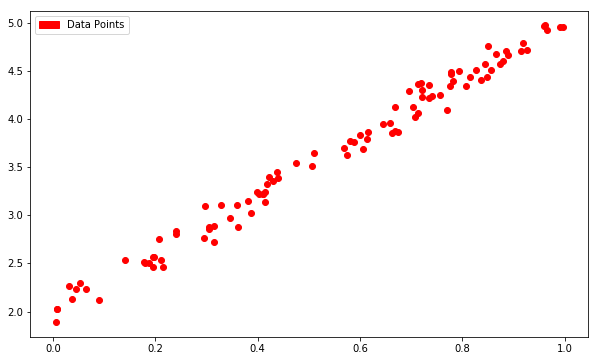

In [0]:
plt.plot(x_data,y_data,'ro')
green_line = mpatches.Patch(color='red',label='Data Points')
plt.legend(handles=[green_line])
plt.show()